In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as ml
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from math import *

# 1. Загрузите данные 
pokemon = pd.read_csv('file:///D:/001/1/pokemon.csv')
abilities = pd.read_csv('file:///D:/001/1/abilities.csv')
egg_groups = pd.read_csv('file:///D:/001/1/egg_groups.csv')

pokemon.head()

,id,identifier,name,name_phonetic,species,name_jp,name_jp_romaji,species_jp,generation_id,ndex,...,exp_yield,base_happiness,egg_group1_id,egg_group2_id,is_baby,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order,legacy_id
0,1,bulbasaur,Bulbasaur,Bulbasaur,Seed,フシギダネ,Fushigidane,たね,1,1,...,64,70,1,7.0,0,NaN,20,1059860,1,1.0
1,2,ivysaur,Ivysaur,Ivysaur,Seed,フシギソウ,Fushigisou,たね,1,2,...,141,70,1,7.0,0,NaN,20,1059860,2,2.0
2,3,venusaur,Venusaur,Veenasore,Seed,フシギバナ,Fushigibana,たね,1,3,...,208,70,1,7.0,0,NaN,20,1059860,3,3.0
3,4,charmander,Charmander,Char-mander,Lizard,ヒトカゲ,Hitokage,とかげ,1,4,...,65,70,1,14.0,0,NaN,20,1059860,4,4.0
4,5,charmeleon,Charmeleon,Char-meeleon,Flame,リザード,Lizardo,かえん,1,5,...,142,70,1,14.0,0,NaN,20,1059860,5,5.0


In [3]:
pokemon.columns

Index(['id', 'identifier', 'name', 'name_phonetic', 'species', 'name_jp',
       'name_jp_romaji', 'species_jp', 'generation_id', 'ndex', 'kdex', 'jdex',
       'jdex_old', 'hdex', 'sdex', 'udex', 'type1_id', 'type2_id',
       'ability1_id', 'ability2_id', 'abilitydream_id',
       'evolution_parent_pokemon_id', 'evolution_method_id',
       'evolution_parameter', 'height', 'weight', 'gender_rate', 'catch_rate',
       'exp_yield', 'base_happiness', 'egg_group1_id', 'egg_group2_id',
       'is_baby', 'baby_breed_item_id', 'hatch_counter', 'lvl_100_exp',
       'pokemon_order', 'legacy_id'],
      dtype='object')

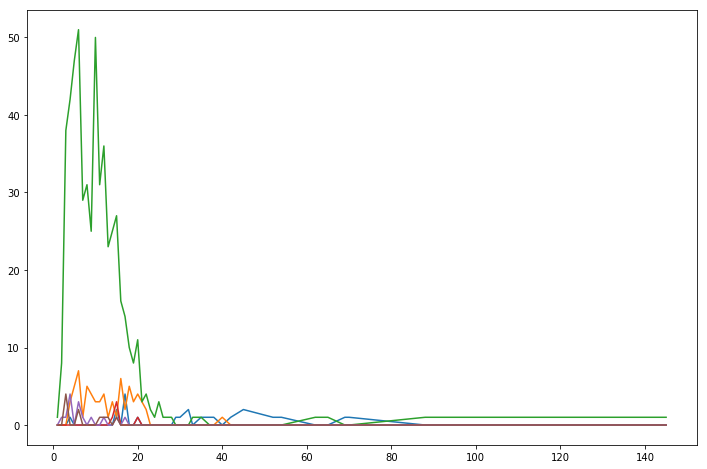

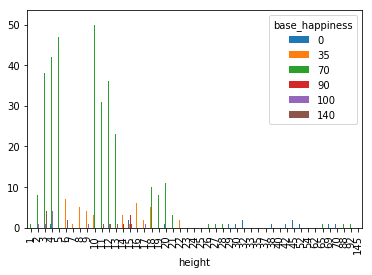

In [35]:
k =pd.crosstab(pokemon['height'],pokemon['base_happiness'] )
plt.figure(figsize=(12,8))
plt.plot(k) 
k.plot(kind='bar')

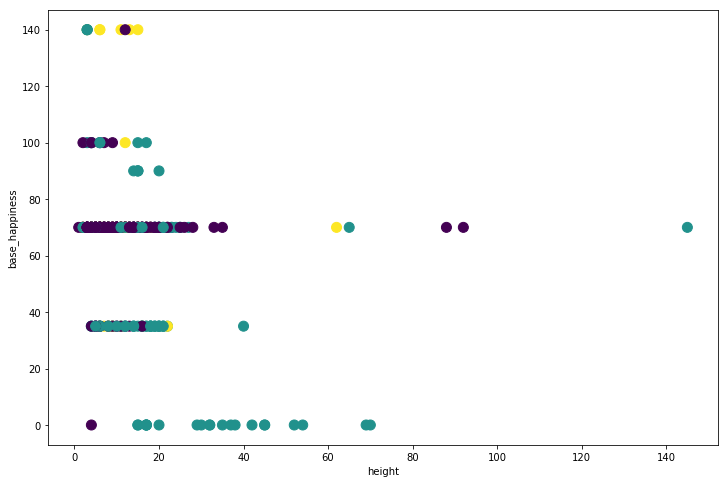

In [10]:
#выделим три кластера 
kmeans = KMeans(n_clusters=3, random_state=1)
numeric_cols = pokemon._get_numeric_data().dropna(axis=1)
kmeans.fit(numeric_cols)
plt.figure(figsize=(12,8))
plt.scatter(pokemon['height'],pokemon['base_happiness'],  c=kmeans.labels_, s=100)
plt.xlabel('height')
plt.ylabel('base_happiness')
plt.show()
# гипотеза о том, что более высокие покены более счастливые не подтвердилась
# на графиках видно, что в основном покемоны имеют рост в диапазоне от 1 до 20 и их уровень счастья соответствует 70 из 140 баллов
# Покемоны ниже 80 могут быть как счастливыми, так и несчастными. Также самые счастливые имеют рост до 20.
# Если покемон ростом выше 80, то уровень его счастья не опускается ниже среднего и остается стабильным.
# Кластеризация тут ни чего не дает, просто попробывал

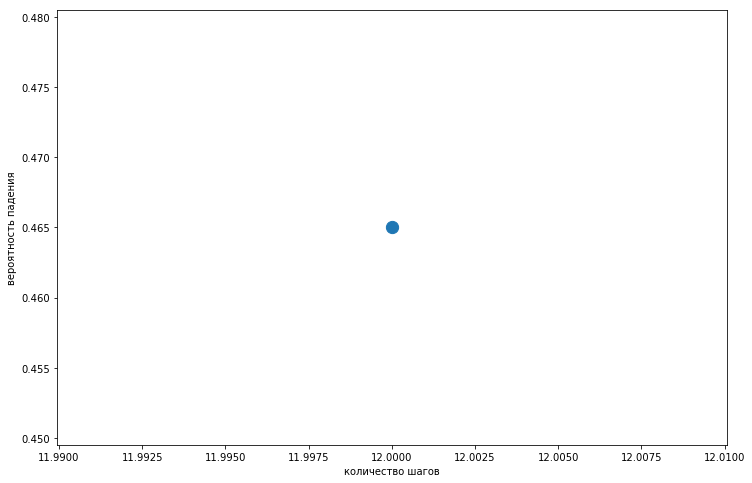

In [52]:
#Пьяница стоит на краю утёса на расстоянии двух шагов и делает случайные шаги вперёд-назад 
#(шаг назад с вероятностью 2/3, шаг вперёд с вероятностью 1/3). 
#Какова вероятность того, что после 5 шагов пьяница не свалился? 
#Напишите функцию, принимающую N и возвращающую вероятность того, что после этих N шагов пьяница жив. 
#Постройте график этой функции.
N=12
def possibility (N):
    x= 0.3333333
    i=3
    while np.any(i<=N):
        y = round((pow(2,(i-2))/pow(3, i)),7)
        x = round((y+ x),3)
        i+=2       
    return x
kl = possibility(N)
plt.figure(figsize=(12,8))
plt.scatter(N,kl,s=150)
plt.xlabel('количество шагов')
plt.ylabel('вероятность падения')
plt.show()
    

In [49]:
kl

0.44